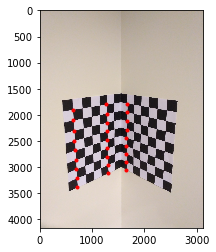

In [2]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('calib-object.jpg')
pix=np.empty((27,2))
W=np.ones((27,4))
pix[:,0]=[1275,1279,1284,1285,1287,1289,1292,1298,1306,1664,1664,1661,1661,1658,1655,1656,1657,1657,629,642,655,655,677,689,697,708,717]
pix[:,1]=[1798,1978,2150,2315,2480,2640,2800,2956,3112,1783,1953,2119,2281,2441,2600,2752,2903,3055,1905,2106,2302,2494,2680,2862,3037,3212,3382]
W[:,0]=[0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0,0,0,0,0,0,0,0,0,0.168,0.168,0.168,0.168,0.168,0.168,0.168,0.168,0.168]
W[:,2]=[0,0,0,0,0,0,0,0,0,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0,0,0,0,0,0,0,0,0]
W[:,1]=[0.028,0.056,0.084,0.112,0.14,0.168,0.196,0.224,0.252,0.028,0.056,0.084,0.112,0.14,0.168,0.196,0.224,0.252,0.028,0.056,0.084,0.112,0.14,0.168,0.196,0.224,0.252]
plt.plot(pix[:,0],pix[:,1],'r.')  

plt.imshow(img)
plt.show()




In [4]:
from random import sample
from scipy import linalg
RANSAC_iter=150
M=np.empty((12,12))
diff=np.empty((27,1))
num_points =[i for i in range(27)]
diff_norm=np.empty((RANSAC_iter,1))
P_=np.empty((RANSAC_iter,3,4))
norm=101
while norm>3.5:
    for k in range(RANSAC_iter): # RANSAC iterations
        six_p = sample(num_points, 6)
        #print(six_p)
        j=0
        for i in six_p:
            M[j,:]=[W[i,0],W[i,1],W[i,2],1,0,0,0,0,-pix[i,0]*W[i,0],-pix[i,0]*W[i,1],-pix[i,0]*W[i,2],-pix[i,0]]
            M[j+1,:]=[0,0,0,0,W[i,0],W[i,1],W[i,2],1,-pix[i,1]*W[i,0],-pix[i,1]*W[i,1],-pix[i,1]*W[i,2],-pix[i,1]]
            j+=2
        (U, S, V) = np.linalg.svd(M, full_matrices=True)
        f = V[-1,:]
        P_[k] =np.reshape(f,(3,4))
        for i in range(27):
            PX=np.matmul(P_[k],W[i])
            PX=PX/(PX[2]+0.0000001)
            diff[i]=np.linalg.norm(pix[i]-PX[0:2])
        diff_norm[k]=np.sum(diff)/27
    norm=np.min(diff_norm[:,0])
    #print(norm)
idx_min= np.argmin(diff_norm)
P=P_[idx_min]
print('diff_norm_chosen',diff_norm[idx_min])
print(P)   
KR=P[:,0:3]
K,R=linalg.rq(KR)
t=np.matmul(linalg.pinv(K),P[:,-1])
K=K/K[2,2]
print('Projection Matrix is:',P)
print('Camera Calibration Matrix is:',K)
print('Rotation Matrix is:',R)
print('Translation Matrix is:',t)
 

diff_norm_chosen [3.20308371]
[[ 6.19832731e-01 -5.89296718e-02 -2.92251715e-01 -1.55295655e-01]
 [ 1.15940046e-01 -6.77861572e-01  6.58043636e-02 -1.59806826e-01]
 [ 1.09479051e-04 -3.80333416e-05  9.53160973e-05 -1.00892050e-04]]
Projection Matrix is: [[ 6.19832731e-01 -5.89296718e-02 -2.92251715e-01 -1.55295655e-01]
 [ 1.15940046e-01 -6.77861572e-01  6.58043636e-02 -1.59806826e-01]
 [ 1.09479051e-04 -3.80333416e-05  9.53160973e-05 -1.00892050e-04]]
Camera Calibration Matrix is: [[-4.18106751e+03 -9.23015774e+01  1.87605057e+03]
 [-0.00000000e+00 -4.15290406e+03  1.98720320e+03]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00]]
Rotation Matrix is: [[ 0.66417231  0.04113628 -0.74644688]
 [-0.16306325 -0.96647137 -0.19835187]
 [-0.729579    0.25345787 -0.63519571]]
Translation Matrix is: [0.05272322 0.06528844 0.6723544 ]
